<a href="https://colab.research.google.com/github/FyodorPi/FyodorPi-heart-disease-data-analysis/blob/main/heart_disease_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('heart-disease-data.zip', 'r') as zip_ref:
    zip_ref.extractall('heart_disease_data')

In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease_data/heart_disease_uci.csv')


In [ ]:
print(df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [ ]:
print(df.describe())


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


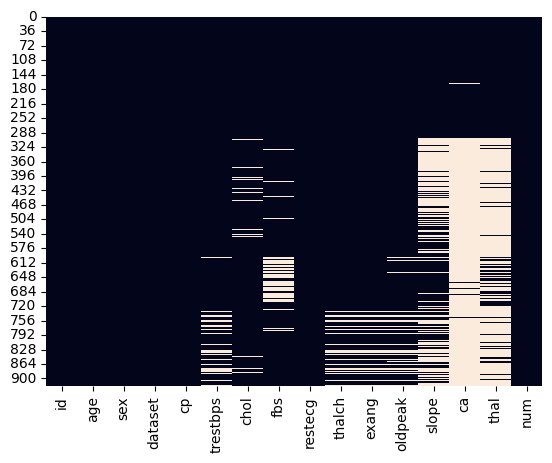

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
df = df.drop(['ca','thal','slope'], axis=1)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


In [ ]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         90
restecg      2
thalch       0
exang       55
oldpeak      0
num          0
dtype: int64


In [ ]:
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

In [ ]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


In [ ]:
duplicates = df.duplicated()
print(f'Количество дубликатов: {duplicates.sum()}')

Количество дубликатов: 0


In [ ]:
df = df.drop_duplicates(subset='id')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 93.6+ KB
None


In [ ]:
df.loc[df['trestbps'] == 0, 'trestbps'] = df['trestbps'].mean()
df.loc[df['chol'] == 0, 'chol'] = df['chol'].mean()
df.loc[df['oldpeak'] < 0, 'oldpeak'] = df['oldpeak'].mean()

In [ ]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  132.276026  236.359052  137.545665    0.904055   
std    265.725422    9.424685   17.920905   55.342996   25.138494    1.027187   
min      1.000000   28.000000   80.000000   85.000000   60.000000    0.000000   
25%    230.750000   47.000000  120.000000  199.130337  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  221.000000  138.000000    0.800000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


<Axes: >

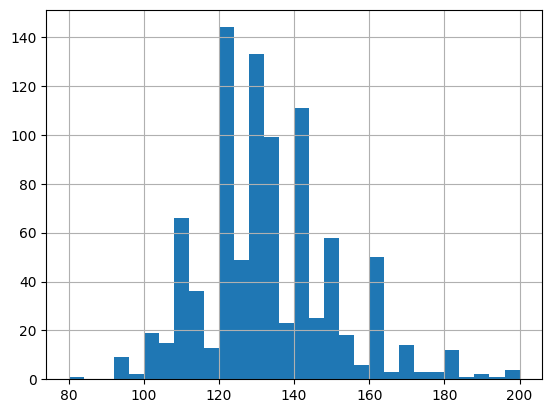

In [ ]:
df['trestbps'].hist(bins=30)

<Axes: ylabel='Density'>

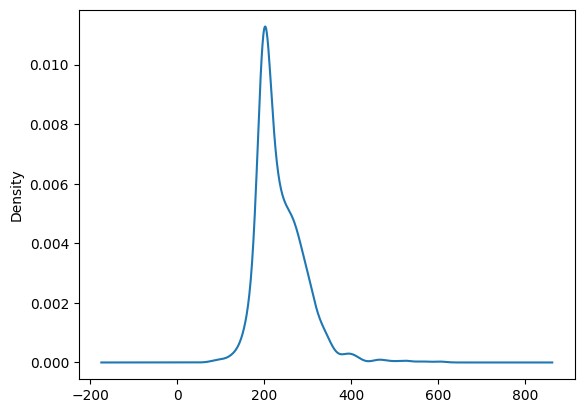

In [ ]:
df['chol'].plot(kind='kde')


<Axes: >

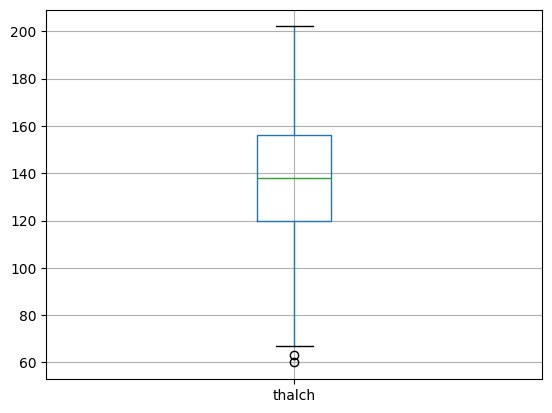

In [ ]:
df.boxplot(column='thalch')


In [ ]:
df.corr(numeric_only=True)

,id,age,trestbps,chol,thalch,oldpeak,num
id,1.000000,0.239301,0.059671,-0.153219,-0.436795,0.065183,0.273552
age,0.239301,1.000000,0.243386,0.028530,-0.353471,0.252264,0.339596
trestbps,0.059671,0.243386,1.000000,0.082821,-0.102099,0.146777,0.133689
chol,-0.153219,0.028530,0.082821,1.000000,0.056931,0.039234,-0.035626
thalch,-0.436795,-0.353471,-0.102099,0.056931,1.000000,-0.168877,-0.351055
oldpeak,0.065183,0.252264,0.146777,0.039234,-0.168877,1.000000,0.434776
num,0.273552,0.339596,0.133689,-0.035626,-0.351055,0.434776,1.000000


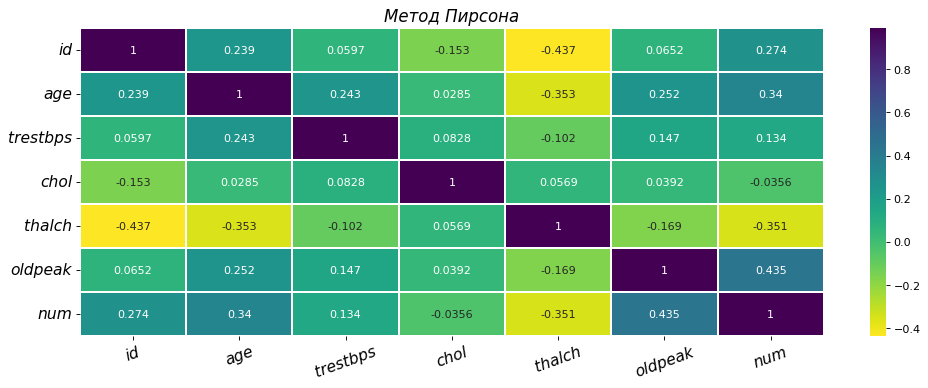

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80)
corr = df.corr(numeric_only=True, method = "pearson")
sns.heatmap(corr, cmap='viridis_r', annot=True, vmax=.99, linewidths=0.01, linecolor="white", fmt='.3g')
plt.title("Метод Пирсона", fontsize=15, style="oblique")
plt.xticks(color = 'black', fontsize=14, style="oblique", rotation=20)
plt.yticks(color = 'black', fontsize=14, style="oblique", rotation=0);

In [ ]:
print('Hello World')